Using Random Forest Regressor

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [2]:
gold_data = pd.read_csv('dataset.csv')

In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
# Step 1: Convert 'Date' column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Step 2: Convert datetime to numeric (timestamp)
gold_data['Date_numeric'] = gold_data['Date'].astype('int64')  # nanoseconds since epoch

# Step 3: Select numeric columns (including 'Date_numeric')
#numeric_data = gold_data.select_dtypes(include='number')

# Step 4: Compute correlation
correlation = gold_data.corr()
print(correlation)


                  Date       SPX       GLD       USO       SLV   EUR/USD  \
Date          1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540   
SPX           0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017   
GLD           0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375   
USO          -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317   
SLV          -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631   
EUR/USD      -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000   
Date_numeric  1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540   

              Date_numeric  
Date              1.000000  
SPX               0.944033  
GLD               0.209118  
USO              -0.782230  
SLV              -0.174108  
EUR/USD          -0.794540  
Date_numeric      1.000000  


<Axes: >

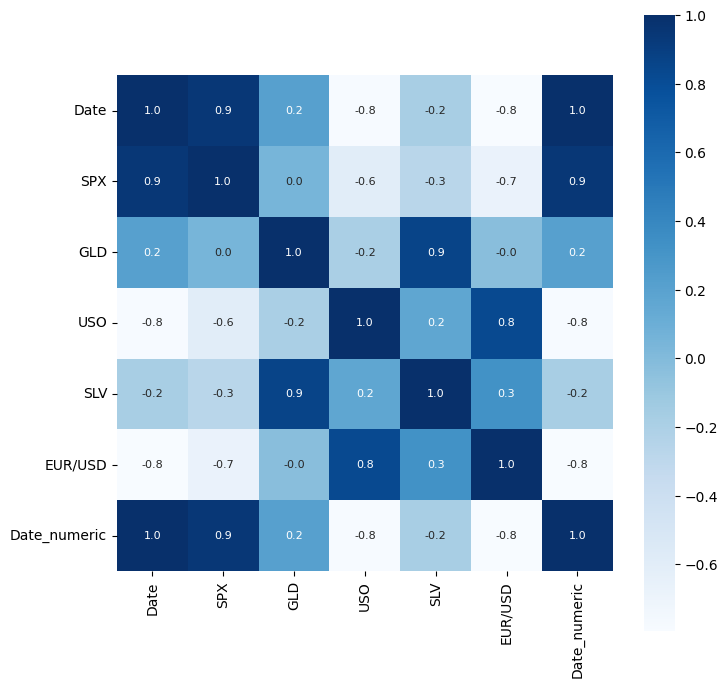

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
#correlation values of GOLD
print(correlation['GLD'])

Date            0.209118
SPX             0.049345
GLD             1.000000
USO            -0.186360
SLV             0.866632
EUR/USD        -0.024375
Date_numeric    0.209118
Name: GLD, dtype: float64


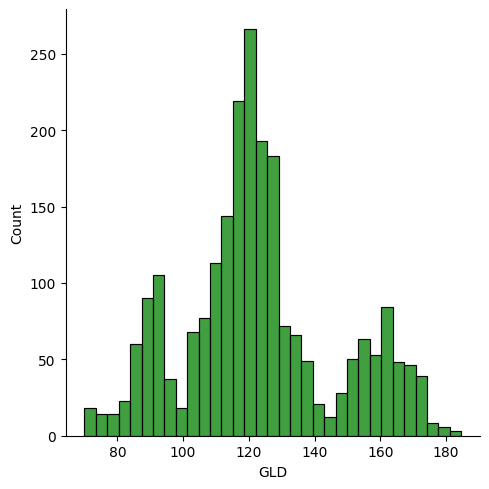

In [ ]:
#checking the distribution of gold prices
sns.displot(gold_data['GLD'],color='green')
#distplot func is deprecated

Splitting features & target

In [21]:
X = gold_data.drop(['Date','GLD','Date_numeric'],axis=1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training & Test Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training using Random Forest Aggressor
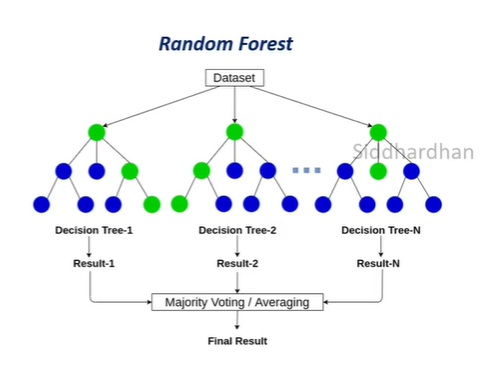

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.38619919  82.08569994 116.00050002 127.63170093 120.91140133
 154.84479748 150.32599866 126.1367004  117.39229863 125.99530082
 116.77630052 172.0775009  141.92269827 167.95789841 115.16070023
 117.97050054 138.45180329 169.74530052 159.91700367 158.72079872
 154.91470036 125.63040023 176.70409936 156.9495035  125.30870048
  94.04559988  77.31959998 120.21840023 119.14299958 167.49999982
  88.11770005 125.42609994  91.2823007  117.62420028 121.09299945
 136.88270072 115.51850104 115.32920049 146.56269966 106.97780104
 104.5729029   87.23149785 126.40850047 118.13610003 152.48079849
 119.72670002 108.39840003 107.97279804  93.29440089 127.11419767
  74.84530061 113.589299   121.52830019 111.37349937 118.98179905
 121.00669919 158.58140097 167.5443013  147.07329709  85.76999863
  94.35170038  86.7905989   90.6524002  118.90020091 126.56540041
 127.40259985 169.82289972 122.25659902 117.28869895  98.33770053
 167.73020191 143.00339806 132.2749025  121.23850187 121.37799924
 119.69890

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.9894287526217785


Compare Actual & Predicted Values

In [31]:
Y_test = list(Y_test)

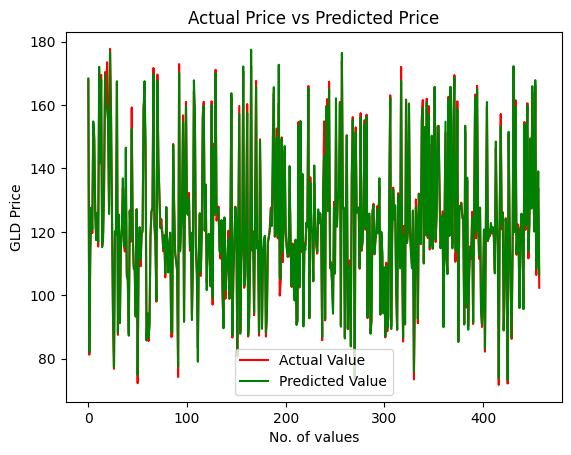

In [33]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()